# Import libraries

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Read the CSV

In [47]:
df = pd.read_csv(r'C:/Users/Usuario/Desktop/ETL/Dataset/Carbon Emission.csv', sep=',')
df.head()

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743


# Description

In [48]:
df.describe()

,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,173.875200,2031.485900,4.024600,12.139200,25.109000,11.889100,2269.147300
std,72.234018,2769.715597,1.990375,7.106369,14.698725,7.277218,1017.675247
min,50.000000,0.000000,1.000000,0.000000,0.000000,0.000000,306.000000
25%,111.000000,69.000000,2.000000,6.000000,13.000000,6.000000,1538.000000
50%,173.000000,823.000000,4.000000,12.000000,25.000000,12.000000,2080.000000
75%,237.000000,2516.750000,6.000000,18.000000,38.000000,18.000000,2768.000000
max,299.000000,9999.000000,7.000000,24.000000,50.000000,24.000000,8377.000000


# Data type

In [49]:
df.dtypes

Body Type                        object
Sex                              object
Diet                             object
How Often Shower                 object
Heating Energy Source            object
Transport                        object
Vehicle Type                     object
Social Activity                  object
Monthly Grocery Bill              int64
Frequency of Traveling by Air    object
Vehicle Monthly Distance Km       int64
Waste Bag Size                   object
Waste Bag Weekly Count            int64
How Long TV PC Daily Hour         int64
How Many New Clothes Monthly      int64
How Long Internet Daily Hour      int64
Energy efficiency                object
Recycling                        object
Cooking_With                     object
CarbonEmission                    int64
dtype: object

# General information of the data

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Body Type                      10000 non-null  object
 1   Sex                            10000 non-null  object
 2   Diet                           10000 non-null  object
 3   How Often Shower               10000 non-null  object
 4   Heating Energy Source          10000 non-null  object
 5   Transport                      10000 non-null  object
 6   Vehicle Type                   3279 non-null   object
 7   Social Activity                10000 non-null  object
 8   Monthly Grocery Bill           10000 non-null  int64 
 9   Frequency of Traveling by Air  10000 non-null  object
 10  Vehicle Monthly Distance Km    10000 non-null  int64 
 11  Waste Bag Size                 10000 non-null  object
 12  Waste Bag Weekly Count         10000 non-null  int64 
 13  Ho

# Convert data

In [51]:
df1 = df.convert_dtypes() 
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Body Type                      10000 non-null  string
 1   Sex                            10000 non-null  string
 2   Diet                           10000 non-null  string
 3   How Often Shower               10000 non-null  string
 4   Heating Energy Source          10000 non-null  string
 5   Transport                      10000 non-null  string
 6   Vehicle Type                   3279 non-null   string
 7   Social Activity                10000 non-null  string
 8   Monthly Grocery Bill           10000 non-null  Int64 
 9   Frequency of Traveling by Air  10000 non-null  string
 10  Vehicle Monthly Distance Km    10000 non-null  Int64 
 11  Waste Bag Size                 10000 non-null  string
 12  Waste Bag Weekly Count         10000 non-null  Int64 
 13  Ho

# Number of rows and columns

In [52]:
print(df.shape)
print(type(df.shape)) #Returns a tuple of the form: ("number of rows", "number of columns")

(10000, 20)
<class 'tuple'>


In [53]:
# Get DataFrame size (number of rows and number of columns)
num_rows, num_cols = df.shape

print(f"Número de filas: {num_rows}")
print(f"Número de columnas: {num_cols}")

#Verify the data type of df.shape
print(f"Tipo: {type(df.shape)}")  # Will print <class 'tuple'>


Número de filas: 10000
Número de columnas: 20
Tipo: <class 'tuple'>


# Unique values

In [54]:
df1['Body Type'].unique()

<StringArray>
['overweight', 'obese', 'underweight', 'normal']
Length: 4, dtype: string

In [55]:
df1['Diet'].unique() 


<StringArray>
['pescatarian', 'vegetarian', 'omnivore', 'vegan']
Length: 4, dtype: string

# Null values

In [56]:
total_valores_nulos = df.isnull().sum().sum()
total_valores_nulos

6721

# Duplicate values

In [57]:
total_duplicados = df.duplicated().sum()
total_duplicados

0

# Graphics

### Distribution graph of the first categorical variable (Body Type)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6632\565910194.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Body Type", palette='Set2')


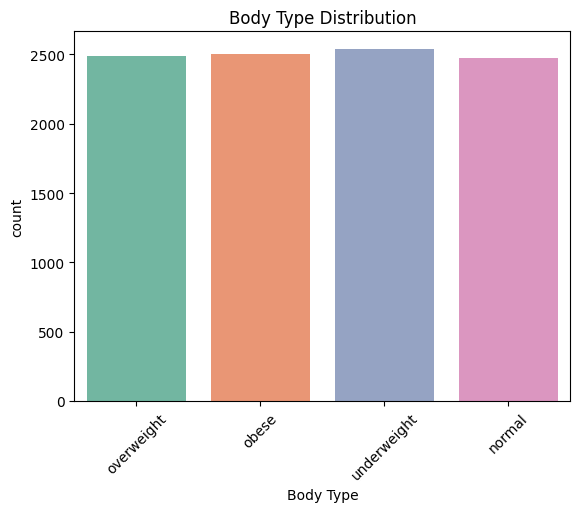

In [58]:
sns.countplot(data=df, x="Body Type", palette='Set2')  
plt.title('Body Type Distribution')
plt.xticks(rotation=45)
plt.show()

#### Get the exact values for body type

In [59]:
valores_body_type = df['Body Type'].value_counts()

# Print the exact values
print("Valores exactos 'Body Type':")
print(valores_body_type)

Valores exactos 'Body Type':
Body Type
underweight    2540
obese          2500
overweight     2487
normal         2473
Name: count, dtype: int64


### Distribution graph of the second categorical variable (Sex)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6632\1761122299.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Sex", palette='Set1')


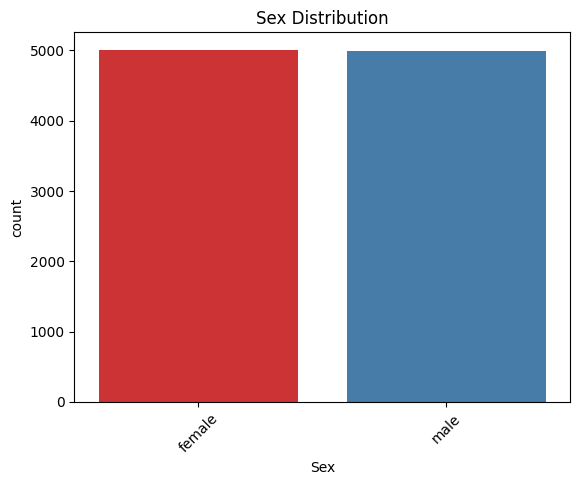

In [60]:
sns.countplot(data=df, x="Sex", palette='Set1')
plt.title('Sex Distribution')
plt.xticks(rotation=45)
plt.show()

#### Obtain the exact values for Sex

In [61]:
valores_sex = df['Sex'].value_counts()

# Print the exact values
print("Valores exactos 'Sex':")
print(valores_sex)


Valores exactos 'Sex':
Sex
female    5007
male      4993
Name: count, dtype: int64


### Pie chart for diet values

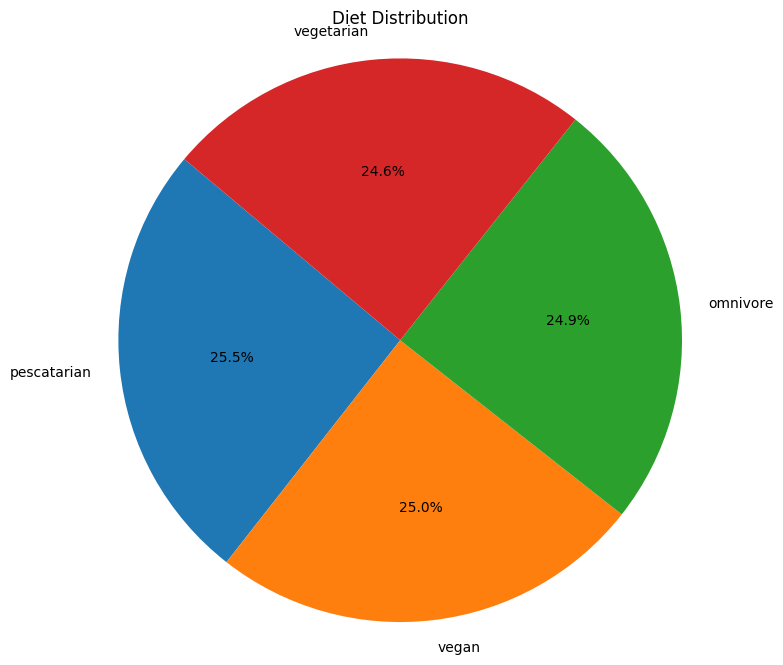

In [62]:
valores_diet = df['Diet'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(valores_diet, labels=valores_diet.index, autopct='%1.1f%%', startangle=140)
plt.title('Diet Distribution')
plt.axis('equal') 
plt.show()


In [63]:
df['CarbonEmission'] = df['CarbonEmission'].astype(float)
df['Vehicle Monthly Distance Km'] = df['Vehicle Monthly Distance Km'].astype(float)

columns_of_interest = ['CarbonEmission', 'Vehicle Monthly Distance Km']


correlation_matrix = df[columns_of_interest].corr()
print(correlation_matrix)

                             CarbonEmission  Vehicle Monthly Distance Km
CarbonEmission                     1.000000                     0.594171
Vehicle Monthly Distance Km        0.594171                     1.000000


### Correlation Matrix between Carbon Emissions and Monthly Distance Traveled per Vehicle

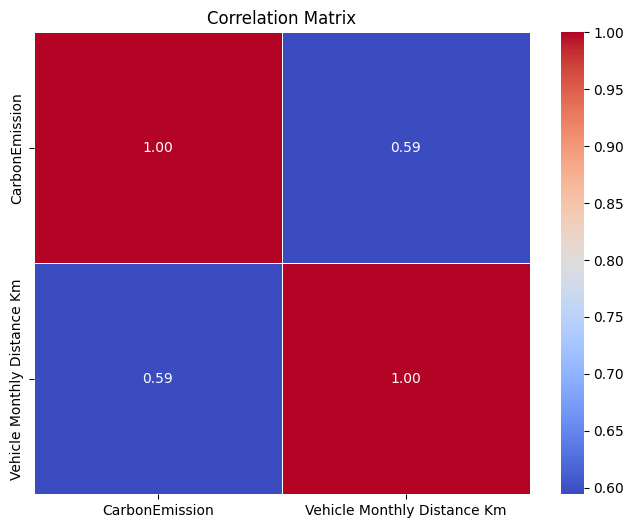

In [64]:
df['CarbonEmission'] = df['CarbonEmission'].astype(float)
df['Vehicle Monthly Distance Km'] = df['Vehicle Monthly Distance Km'].astype(float)

columns_of_interest = ['CarbonEmission', 'Vehicle Monthly Distance Km']

correlation_matrix = df[columns_of_interest].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()